# <center> Продвинутое машинное обучение
## <center> Домашнее задание № 3

## <center> Хуббатулин Марк. Группа DS2-1

В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:

<center><img src="data/pic/dancing_man.png"/></center>

Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.
В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски

### Оглавление <a name = 'outline'></a>
* [Задание№1](#part1) 
* [Задание№2](#part2) 
* [Задание№3](#part3) 
* [Задание№4](#part4) 
* [Задание№5](#part5) 
* [Задание№6](#part6) 

> 1.) <a name = 'part1'></a> Реализуйте базовый частотный метод по Шерлоку Холмсу:
подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
расшифруйте их таким частотным методом.

In [1]:
import re
import random
import copy
import string
from collections import Counter

from tqdm.notebook import tqdm
from textwrap import wrap
from asrtoolkit import cer
import numpy as np
import pandas as pd
from nltk import everygrams
from nltk.tokenize import word_tokenize

np.random.seed(42)

import matplotlib.pyplot as plt

RU_ALPHABET = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '

In [2]:
with open('data/books/WarAndPeace.txt', 'r') as fin:
    wp_text = fin.read()
    
with open('data/books/AnnaKarenina.txt', 'r') as fin:
    ak_text = fin.read()

In [3]:
def validation(word):
    match = re.match("^[А-Яа-яё]+$", word)
    return bool(match)

def tokenize(text):
    tokens = word_tokenize(text, language='russian')
    tokens = [word.lower() for word in tokens if validation(word)] 
    
    return tokens

def n_gram_sorted_frequency(text, n_gram=1):
    freqs = dict()
    text = [''.join(ngram) for ngram in everygrams(text, min_len=n_gram, max_len=n_gram)]
    return dict(Counter(text).most_common())

In [4]:
tokens_wp = tokenize(wp_text)
tokens_ak = tokenize(ak_text)

In [5]:
clear_text_wp = ' '.join(tokens_wp)
clear_text_ak = ' '.join(tokens_ak)

In [6]:
symbol_cnt_wp = n_gram_sorted_frequency(clear_text_wp, 1)
symbol_cnt_ak = n_gram_sorted_frequency(clear_text_ak, 1)

In [7]:
symbol_df = pd.DataFrame()
symbol_df['Война и Мир'] = symbol_cnt_wp.keys()
symbol_df['Анна Каренина'] = symbol_cnt_ak.keys()
symbol_df[symbol_df['Анна Каренина'] != symbol_df['Война и Мир']]

,Война и Мир,Анна Каренина
2,а,е
3,е,а
4,и,н
5,н,и
17,г,ь
18,ь,ы
19,ы,г
20,з,б
21,б,ч
22,ч,з


**Частота символов в "Анне Карениной" и "Войне и Мир" различная. Поэкспериментируем - потом для честности объединим тексты**

**Напишем простой шифратор со случайным мапингом алфавита**

In [8]:
class Cipher:
    
    def __init__(self, alphabet):
        self.alphabet = alphabet
        shuffle = np.random.choice(alphabet, replace=False, size=len(alphabet))
        self.orig2ciph = dict()
        self.ciph2orig = dict()
        for original_char, shuffle_char in zip(alphabet, shuffle):
            self.orig2ciph[original_char] = shuffle_char
            self.ciph2orig[shuffle_char] = original_char
    
    def decode(self, text):
        return ''.join([self.ciph2orig[char] for char in text])

    def encode(self, text):
        return ''.join([self.orig2ciph[char] for char in text])

In [9]:
ru_cipher = Cipher(list(RU_ALPHABET))

In [10]:
WP_TEST = """
Кутузов не ответил. Он, казалось, уж забыл о том, что было сказано им, и сидел задумавшись. 
Через пять минут, плавно раскачиваясь на мягких рессорах коляски, Кутузов обратился к князю Андрею. 
На лице его не было и следа волнения. 
Он с тонкою насмешливостью расспрашивал князя Андрея о подробностях его свидания с императором, об отзывах, 
слышанных при дворе о кремском деле, и о некоторых общих знакомых женщинах.
"""

In [11]:
clear_wp_test = ' '.join(tokenize(WP_TEST))
' '.join(tokenize(WP_TEST))

'кутузов не ответил он казалось уж забыл о том что было сказано им и сидел задумавшись через пять минут плавно раскачиваясь на мягких рессорах коляски кутузов обратился к князю андрею на лице его не было и следа волнения он с тонкою насмешливостью расспрашивал князя андрея о подробностях его свидания с императором об отзывах слышанных при дворе о кремском деле и о некоторых общих знакомых женщинах'

In [12]:
encode_wp_test = ru_cipher.encode(clear_wp_test)
encode_wp_test

'дгэгямъыечымэъчэипымеыдояопмв ыглыяотупымыэмрыхэмытупмывдояоемыирыиывизчпыяозгроъсив ыхчбчяыкнэ ыриегэыкпоъемыбовдохиъонв ыеоырнщдицыбчввмбоцыдмпнвдиыдгэгямъымтбоэипвныдыденяйыоезбчйыеоыпиючычщмыечытупмыиывпчзоыъмпечеинымеывыэмедмйыеоврчспиъмвэ йыбоввкбосиъопыденяныоезбчнымыкмзбмтемвэнцычщмывъизоеинывыиркчбоэмбмрымтымэяуъоцывпусоееуцыкбиызъмбчымыдбчрвдмрызчпчыиымыечдмэмбуцымтшицыяеодмруцылчешиеоц'

In [13]:
decode_wp_test = ru_cipher.decode(encode_wp_test)
decode_wp_test

'кутузов не ответил он казалось уж забыл о том что было сказано им и сидел задумавшись через пять минут плавно раскачиваясь на мягких рессорах коляски кутузов обратился к князю андрею на лице его не было и следа волнения он с тонкою насмешливостью расспрашивал князя андрея о подробностях его свидания с императором об отзывах слышанных при дворе о кремском деле и о некоторых общих знакомых женщинах'

In [14]:
print(f"Character Error Rate: {cer(clear_wp_test, decode_wp_test)}")

Character Error Rate: 0.0


**Кодирует - Декодирует верно**

**Объединим книжки - это будет наше обучение. За тест будем брать тексты различной длины****

In [15]:
train = clear_text_wp + clear_text_ak

In [16]:
def random_test(text, text_len=1000):
    list_word = text.split(' ')
    idx = np.random.randint(0, len(list_word) - text_len + 1)
    return ' '.join(list_word[idx : idx + text_len])

In [17]:
def decode(train_freq, test_freq, text):
    new_mapping = dict(zip(test_freq, train_freq))
    no_key = list(train_freq.keys() - new_mapping.keys())
    shuffled_no_key = random.sample(no_key, len(no_key))
    for orig, shuffled in zip(no_key, shuffled_no_key):
        new_mapping[shuffled] = orig
    return ''.join([new_mapping[char] for char in text])

In [18]:
test = random_test(train, 100)
test

'и сняла перчатки передвигая стулья и кресла с помощью незаметных лакеев общество разместилось разделившись на две части у самовара с хозяйкой и на противоположном конце гостиной около красивой жены посланника в черном бархате и с черными резкими бровями разговор в обоих центрах как и всегда в первые минуты колебался перебиваемый встречами приветствиями предложениями чая как бы отыскивая на чем остановиться она необыкновенно хороша как актриса видно что она изучала каульбаха говорил дипломат в кружке жены посланника вы заметили как она ах пожалуйста не будем говорить про нильсон про нее нельзя ничего сказать нового сказала толстая красная без бровей и без'

In [19]:
encoded_test = ru_cipher.decode(test)

In [20]:
symbol_freq_test = n_gram_sorted_frequency(encoded_test, 1)
symbol_freq_train = n_gram_sorted_frequency(train, 1)

In [21]:
decoded_test = decode(symbol_freq_train, symbol_freq_test, encoded_test)
decoded_test

'н тиуко масгорвн масаблнзоу трчкыу н всатко т медехыц иаподариьж коваал еяхатрле сопдатрнкеты сопбакнлюнты ио бла готрн ч тоделосо т жепуйвей н ио мсернлемекешиед веиэа зетрнией евеке всотнлей шаиь меткоиинво л гасиед яосжора н т гасиьдн сапвндн яселудн сопзелес л еяенж эаирсож вов н лтазбо л масльа дничрь векаяокту масаянлоадьй лтрсагодн мснлартрлнудн мсабкешаинудн гоу вов яь ерьтвнлоу ио гад етроиелнрыту еио иаеяьвиелаиие жесеюо вов оврснто лнбие гре еио нпчгоко вочкыяожо зелеснк бнмкедор л всчшва шаиь меткоиинво ль подарнкн вов еио ож мешокчйтро иа ячбад зелеснры мсе инкытеи мсе иаа иакыпу ингазе твопоры иелезе твопоко ректроу всотиоу яап яселай н яап'

In [22]:
print(f"Character Error Rate: {cer(test, decoded_test)}")

Character Error Rate: 82.93051359516616


In [23]:
cer_list = []
text_sizes = [100, 200, 400, 800, 1000, 1500, 2000, 4000, 5000]
for text_len in text_sizes:
    mean_list = []
    for _ in range(10):
        test = random_test(train, text_len)
        encoded_test = ru_cipher.decode(test)
        symbol_freq_test = n_gram_sorted_frequency(encoded_test, 1)
        decoded_test = decode(symbol_freq_train, symbol_freq_test, encoded_test)
        mean_list.append(cer(test, decoded_test))
    cer_list.append(np.array(mean_list).mean())

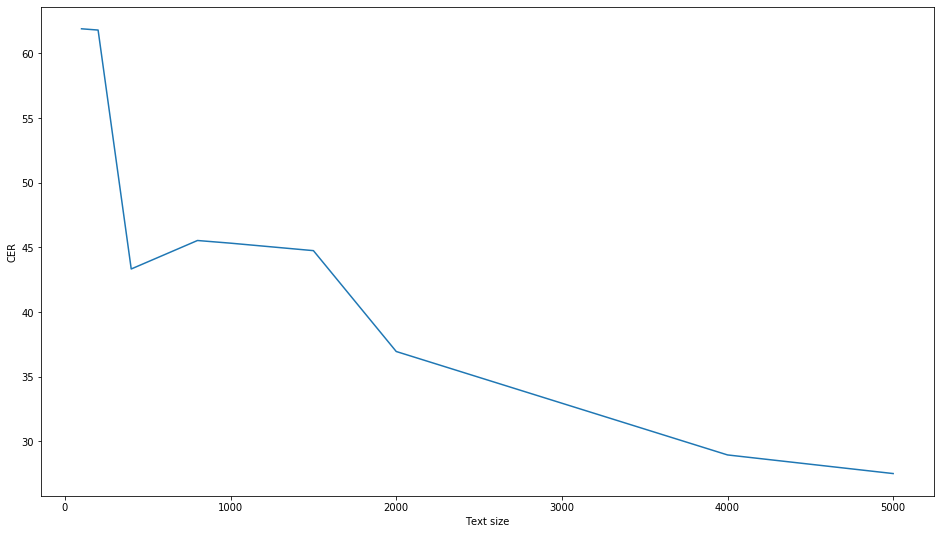

In [24]:
plt.figure(figsize=(16, 9))
plt.plot(text_sizes, cer_list)
plt.xlabel('Text size')
plt.ylabel('CER');

[Вернуться к оглавлению](#outline)

> 2.)  <a name = 'part2'></a> Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
> - подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
> - проведите тестирование аналогично п.1, но при помощи биграмм


In [25]:
gram_2_train = n_gram_sorted_frequency(train, 2)
gram_2_test = n_gram_sorted_frequency(encoded_test, 2) 

In [26]:
def decode(train_freq, test_freq, text):
    new_mapping = dict(zip(test_freq, train_freq))
    return ''.join([new_mapping[char] if char in list(new_mapping.keys()) else char for char in wrap(text, 2)]) 

In [27]:
decoded_test = decode(gram_2_train, gram_2_test, encoded_test)

In [28]:
print(f"Character Error Rate: {cer(test, decoded_test)}")

Character Error Rate: 76.53215719834112


In [29]:
cer_list = []
text_sizes = [100, 200, 400, 800, 1000, 1500, 2000, 4000, 5000]
gram_2_train = n_gram_sorted_frequency(train, 2)
for text_len in text_sizes:
    mean_list = []
    for _ in range(10):
        test = random_test(train, text_len)
        encoded_test = ru_cipher.decode(test)
        gram_2_test = n_gram_sorted_frequency(encoded_test, 2)
        decoded_test = decode(gram_2_train, gram_2_test, encoded_test)
        mean_list.append(cer(test, decoded_test))
    cer_list.append(np.array(mean_list).mean())

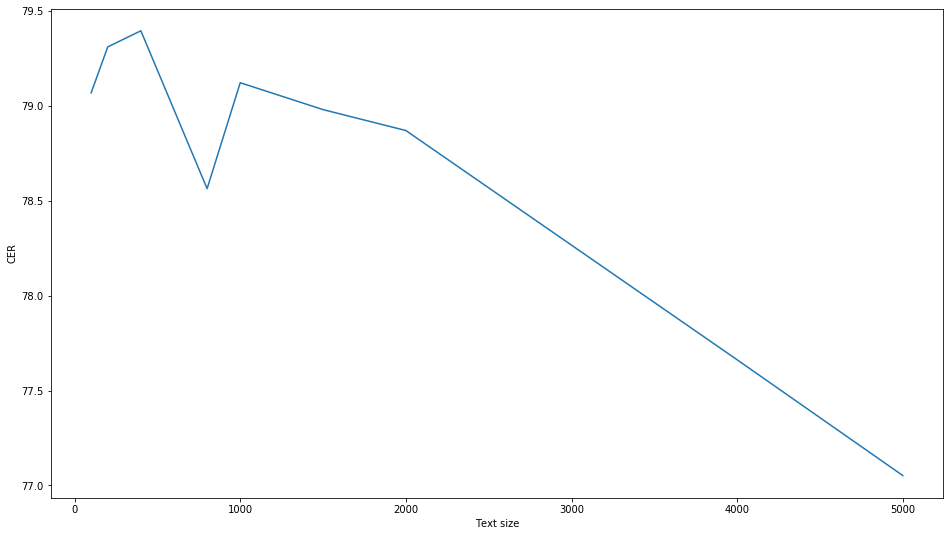

In [30]:
plt.figure(figsize=(16, 9))
plt.plot(text_sizes, cer_list)
plt.xlabel('Text size')
plt.ylabel('CER');

**Для биграмм текст слишком мал - частоты обучения и теста сильно отличаются**

[Вернуться к оглавлению](#outline)

> 3.)  <a name = 'part3'></a> Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
> * предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
> * реализуйте и протестируйте его, убедитесь, что результаты улучшились.


In [31]:
test = random_test(train, 200)
test

'из глаз он нагнулся к ее руке и стал целовать стараясь скрыть свое волнение которое он знал не имело никакого основания но он не мог преодолеть его вот так вот это лучше говорила она пожимая сильным движением его руку вот одно одно что нам осталось он опомнился и поднял голову что за вздор что за бессмысленный вздор ты говоришь нет это правда что что правда что я умру я видела сон сон повторил вронский и мгновенно вспомнил своего мужика во сне да сон сказала она давно уж я видела этот сон я видела что я вбежала в свою спальню что мне нужно там взять узнать ты знаешь как это бывает во сне говорила она с ужасом широко открывая глаза и в спальне в углу стоит ах какой вздор как можно но она не позволила себя перебить то что она говорила было слишком важно для нее и это повернулось и я вижу что это мужик маленький с взъерошенною бородой и страшный я хотела бежать но он нагнулся над мешком и руками копошится она представила как он копошится в мешке ужас был на ее лице и вронский вспоминая с

In [32]:
encoded_test = ru_cipher.encode(test)
encoded_test

'ияыщпояымеыеощегпвныдыччыбгдчыиывэопыючпмъоэ ывэобонв ывдбуэ ывъмчыъмпечеичыдмэмбмчымеыяеопыечыирчпмыеидодмщмымвемъоеиныемымеыечырмщыкбчмзмпчэ ычщмыъмэыэодыъмэыжэмыпгхсчыщмъмбипоымеоыкмлиронывип еурызъилчеичрычщмыбгдгыъмэымземымземыхэмыеорымвэопмв ымеымкмреипвныиыкмзенпыщмпмъгыхэмыяоыъязмбыхэмыяоытчвврувпчееуаыъязмбыэуыщмъмбис ыечэыжэмыкбоъзоыхэмыхэмыкбоъзоыхэмыныгрбгыныъизчпоывмеывмеыкмъэмбипыъбмевдиаыиырщемъчеемыъвкмреипывъмчщмырглидоыъмывечызоывмеывдояопоымеоызоъемыглыныъизчпоыжэмэывмеыныъизчпоыхэмыныътчлопоыъывъмйывкоп ейыхэмыречыеглемыэорыъянэ ыгяеоэ ыэуыяеочс ыдодыжэмытуъочэыъмывечыщмъмбипоымеоывыгловмрысибмдмымэдбуъоныщпояоыиыъывкоп ечыъыгщпгывэмиэыоцыдодмаыъязмбыдодырмлемыемымеоыечыкмяъмпипоывчтныкчбчтиэ ыэмыхэмымеоыщмъмбипоытупмывписдмрыъолемызпныеччыиыжэмыкмъчбегпмв ыиыныъилгыхэмыжэмырглидыропче диаывыъяёчбмсчеемйытмбмзмаыиывэбосеуаыныцмэчпоытчлоэ ыемымеыеощегпвныеозырчсдмрыиыбгдориыдмкмсиэвнымеоыкбчзвэоъипоыдодымеыдмкмсиэвныъырчсдчыгловытупыеоыччыпиючыиыъбмевдиаыъвкмриеоныв

In [33]:
def normalize_freq(text, ngram):
    ngram_dict = n_gram_sorted_frequency(text, ngram)
    ngram_sum = sum(ngram_dict.values())
    ngram_dict.update({n: ngram_dict[n] / ngram_sum for n in ngram_dict.keys()})

    return ngram_dict

In [34]:
def decode(text, char_map):
    return ''.join([char_map[c] if c in char_map.keys() else c for c in text])

In [35]:
def get_text_proba(text, mapping, freqs, n_gram=2):
    decoded_text = decode(text, mapping)
    log_proba = 0
    for i in range(len(decoded_text) - n_gram):
        bigram = decoded_text[i: i + n_gram]
        bigram_proba = freqs.get(bigram)
        if bigram_proba is None:
            bigram_proba = 1 / (len(text) + len(mapping.keys())**n_gram)
        log_proba += np.log(bigram_proba)
    return log_proba

In [36]:
class MCMC():
    
    def __init__(self, train_alphabet, train_freq, n_gram):
        self.train_alphabet = list(train_alphabet)
        self.train_freq = train_freq
        self.n_gram = n_gram
        
    def fit(self, text, text_alphabet, steps, n_epochs):
        
        accept_count = 0
        best_mapping = None
        all_mappings = []
        best_log_likekihood = -np.inf

        for trial in tqdm(range(n_epochs), leave=False, position=0, total=n_epochs):

            text_alphabet = list(text_alphabet)
            reverse_mapping = {k: v for k, v in zip(text_alphabet, self.train_alphabet[:len(text_alphabet)])}
            log_proba_current = get_text_proba(text, reverse_mapping, self.train_freq, n_gram=self.n_gram)

            for i in range(steps):
                abc_proposal = copy.copy(self.train_alphabet)
                idx1, idx2 = np.random.choice(len(abc_proposal), replace=False, size=2)
                abc_proposal[idx1], abc_proposal[idx2] = abc_proposal[idx2], abc_proposal[idx1]
                reverse_mapping_proposal = {k: v for k, v in zip(text_alphabet, abc_proposal[:len(text_alphabet)])}
                log_proba_proposal = get_text_proba(text, reverse_mapping_proposal, self.train_freq, n_gram=self.n_gram)

                p_accept = np.exp(log_proba_proposal - log_proba_current)

                if p_accept > np.random.rand():
                    accept_count += 1
                    self.train_alphabet = abc_proposal
                    log_proba_current = log_proba_proposal
                    reverse_mapping = reverse_mapping_proposal

            if log_proba_current > best_log_likekihood:
                best_log_likekihood = log_proba_current
                self.mapping = reverse_mapping
                
    def get_mapping(self):
        return self.mapping

In [37]:
bigramm_freq = normalize_freq(train, 2)
test_alphabet = set(encoded_test)

In [38]:
mcmc = MCMC(list(RU_ALPHABET), bigramm_freq, 2)

In [39]:
mcmc.fit(encoded_test, test_alphabet, 10000, 20)

In [40]:
decoded_test = decode(encoded_test, mcmc.get_mapping())
decoded_test

'из глаз он нагнулся к ее руке и стал целовать стараясь скрыть свое волнение которое он знал не имело никакого основания но он не мог преодолеть его вот так вот это лучше говорила она пожимая сильным движением его руку вот одно одно что нам осталось он опомнился и поднял голову что за вздор что за бессмысленный вздор ты говоришь нет это правда что что правда что я умру я видела сон сон повторил вронский и мгновенно вспомнил своего мужика во сне да сон сказала она давно уж я видела этот сон я видела что я вбежала в свою спальню что мне нужно там взять узнать ты знаешь как это бывает во сне говорила она с ужасом широко открывая глаза и в спальне в углу стоит ах какой вздор как можно но она не позволила себя перебить то что она говорила было слишком важно для нее и это повернулось и я вижу что это мужик маленький с взщерошенною бородой и страшный я хотела бежать но он нагнулся над мешком и руками копошится она представила как он копошится в мешке ужас был на ее лице и вронский вспоминая с

In [41]:
print(f"Character Error Rate: {cer(test, decoded_test)}")

Character Error Rate: 0.09233610341643583


[Вернуться к оглавлению](#outline)

> 4.)  <a name = 'part4'></a> Расшифруйте сообщение:

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹
⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨
←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘
⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

In [42]:
text_1 = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

In [43]:
original_message = "если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю"

In [44]:
mcmc_1 = MCMC(list(RU_ALPHABET), bigramm_freq, 2)

In [45]:
mcmc_1.fit(text_1, list(set(text_1)), 10000, 50)

In [48]:
decoded_test = decode(text_1, mcmc_1.get_mapping())
decoded_test

'если вы вимите нордальный или почти нордальный текст у этого соожшения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный жалл за послемнее четвертое замание курса ботя конечно я ничего не ожешащ'

In [49]:
print(f"Character Error Rate: {cer(original_message, decoded_test)}")

Character Error Rate: 6.521739130434782


[Вернуться к оглавлению](#outline)

> 5.)  <a name = 'part5'></a> А что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

In [76]:
np.random.seed(0)

In [77]:
gramm_3_freq = normalize_freq(train, 3)

In [78]:
mcmc_3 = MCMC(list(RU_ALPHABET), gramm_3_freq, 3)

In [79]:
mcmc_3.fit(text_1, list(set(text_1)), 10000, 50)

In [80]:
decoded_test = decode(text_1, mcmc_3.get_mapping())
decoded_test

'если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаъ'

In [81]:
print(f"Character Error Rate: {cer(original_message, decoded_test)}")

Character Error Rate: 0.43478260869565216


In [116]:
np.random.seed(5)

In [117]:
gramm_4_freq = normalize_freq(train, 4)

In [118]:
mcmc_4 = MCMC(list(RU_ALPHABET), gramm_4_freq, 4)

In [119]:
mcmc_4.fit(text_1, list(set(text_1)), 50000, 50)

In [120]:
decoded_test = decode(text_1, mcmc_4.get_mapping())
decoded_test

'отанисуисньнвоим былахмужинания квним былахмуживоетвидиюв й ит  промншие в бужиаойе ияб кнвлвхите бооистой исуистоитьоаланияблснахм иния адкнвоиылетнылахмужиплааизлия таоьмооиковсобв оизльлмноиедбтлич вшие мокм ишимнкой имои порлг'

In [121]:
print(f"Character Error Rate: {cer(original_message, decoded_test)}")

Character Error Rate: 86.52173913043478


**На триграммах точность сильно улучшилась, но на 4х-граммах при различных сидах и при увеличении итераций не сходится:(**

[Вернуться к оглавлению](#outline)

> 6.)  <a name = 'part6'></a> Какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

После мысли разгадки шифров сразу хочется подумать об реверс-инженеринге,о дизассемблировании. Также модель может применять в биологии для генных последовательностей. Возможно в алгоритмах восстановления сигналов, изображений.

[Вернуться к оглавлению](#outline)